## Homework 10

### Task 1

In [1]:
%load_ext line_profiler

In [2]:
import numpy as np
from skimage import data, color
from skimage.transform import resize

imgs = np.uint8(data.lfw_subset()*255)

def res_skimage(imgs):
    new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
    res_im = []
    for im in imgs:
        image_resized = resize(im, new_size, anti_aliasing=True)
        res_im.append(image_resized)
    return np.asarray(res_im)

In [3]:
%lprun -f res_skimage res_skimage(imgs)

Timer unit: 1e-07 s

Total time: 0.159843 s
File: C:\Users\Norbert\AppData\Local\Temp\ipykernel_19752\2144872041.py
Function: res_skimage at line 7

Line #      Hits         Time  Per Hit   % Time  Line Contents
     7                                           def res_skimage(imgs):
     8         1         99.0     99.0      0.0      new_size = (imgs[1].shape[0]//2, imgs[1].shape[1]//2)
     9         1          8.0      8.0      0.0      res_im = []
    10       201       4379.0     21.8      0.3      for im in imgs:
    11       200    1586764.0   7933.8     99.3          image_resized = resize(im, new_size, anti_aliasing=True)
    12       200       3203.0     16.0      0.2          res_im.append(image_resized)
    13         1       3982.0   3982.0      0.2      return np.asarray(res_im)

In [4]:
import cv2

def res_opencv(imgs):
    new_size = (imgs[1].shape[1] // 2, imgs[1].shape[0] // 2)  # OpenCV erwartet (Breite, Höhe)
    res_im = [cv2.resize(im, new_size, interpolation=cv2.INTER_LINEAR) for im in imgs]
    return np.asarray(res_im)


In [5]:
%lprun -f res_opencv res_opencv(imgs)

Timer unit: 1e-07 s

Total time: 0.009959 s
File: C:\Users\Norbert\AppData\Local\Temp\ipykernel_19752\1799135549.py
Function: res_opencv at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def res_opencv(imgs):
     4         1         91.0     91.0      0.1      new_size = (imgs[1].shape[1] // 2, imgs[1].shape[0] // 2)  # OpenCV erwartet (Breite, Höhe)
     5         1      97287.0  97287.0     97.7      res_im = [cv2.resize(im, new_size, interpolation=cv2.INTER_LINEAR) for im in imgs]
     6         1       2212.0   2212.0      2.2      return np.asarray(res_im)

### Task 2

In [1]:
def approximate_pi(n):
    pi_2 = 1
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2:
            nom += 2
        else:
            den += 2
    return 2*pi_2

# List of N values to process
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_66, 200_745_654]

for num in nums:
    result = approximate_pi(num)
    print(f"N = {num}: Approximation of Pi = {result}")

N = 1822725: Approximation of Pi = 3.1415935153733052
N = 22059421: Approximation of Pi = 3.1415927247955033
N = 32374695: Approximation of Pi = 3.1415927021077117
N = 88754320: Approximation of Pi = 3.141592635888531
N = 9716266: Approximation of Pi = 3.1415924919219385
N = 200745654: Approximation of Pi = 3.141592645761164


Multiprocessing example placed in dsss_multiprocessing.py

### Task 3

In [2]:
from numba import jit

# JIT-compiled function
@jit(nopython=True)  # Activates aggressive optimization
def approximate_pi_numba(n):
    pi_2 = 1.0
    nom, den = 2.0, 1.0
    for i in range(n):
        pi_2 *= nom / den
        if i % 2 == 0:
            den += 2
        else:
            nom += 2
    return 2 * pi_2

# Testrun
nums = [1_822_725, 22_059_421, 32_374_695, 88_754_320, 97_162_66, 200_745_654]
if __name__ == "__main__":
    results = [approximate_pi_numba(n) for n in nums]
    for n, pi_approx in zip(nums, results):
        print(f"N = {n}: Approximation of Pi = {pi_approx}")

print(results)
print(nums)


N = 1822725: Approximation of Pi = 3.1415935153733052
N = 22059421: Approximation of Pi = 3.1415927247955033
N = 32374695: Approximation of Pi = 3.1415927021077117
N = 88754320: Approximation of Pi = 3.141592635888531
N = 9716266: Approximation of Pi = 3.1415924919219385
N = 200745654: Approximation of Pi = 3.141592645761164
[3.1415935153733052, 3.1415927247955033, 3.1415927021077117, 3.141592635888531, 3.1415924919219385, 3.141592645761164]
[1822725, 22059421, 32374695, 88754320, 9716266, 200745654]


### Task 4

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from math import pi

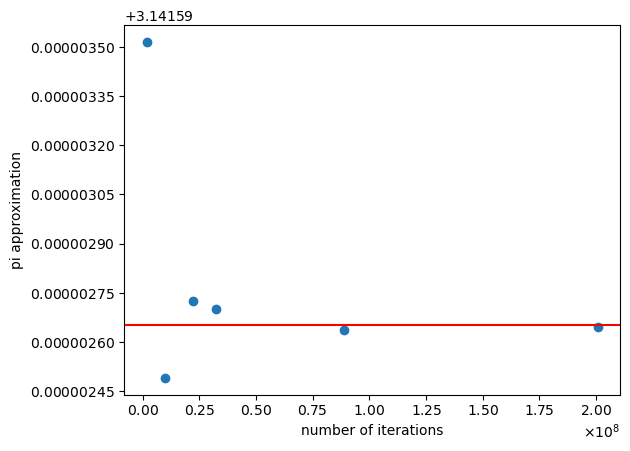

In [17]:


fig, ax = plt.subplots()

ax.plot(nums, results, marker="o", ls="")
plt.axhline(y=np.pi, color='r')

formatter = ScalarFormatter(useMathText=True)
ax.xaxis.set_major_formatter(formatter)
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0, 0))

# Y-Achse als normale Zahlen darstellen
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_locator(MaxNLocator(integer=False))  # Keine Offset-Anzeige, kontinuierliche Werte

plt.xlabel('number of iterations')
plt.ylabel('pi approximation')
plt.show()

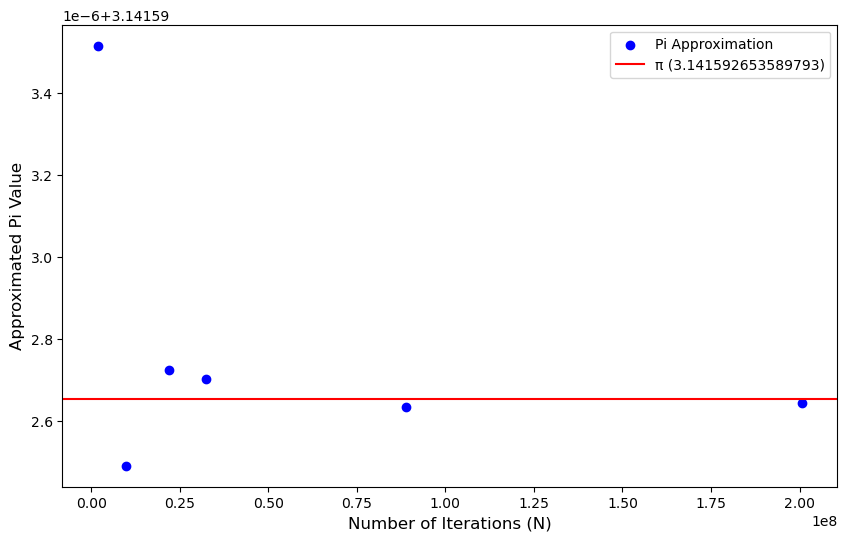

In [12]:
# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(nums, results, color="blue", label="Pi Approximation")
plt.axhline(y=pi, color="red", linestyle="-", label="π (3.141592653589793)")

# Add labels and title
plt.xlabel("Number of Iterations (N)", fontsize=12)
plt.ylabel("Approximated Pi Value", fontsize=12)
plt.legend()

# Show plot
plt.show()